
## Description: 
From the given loan dataset which contains the details about loan which were offered to the borrowers, apply Data analysis and Exploratory Data Analysis (EDA) techniques to find the pattern in the loans got defaulted and prepare insights from them.

## Problem statement : 
Prepare Insights from the Loan dataset to help lending institutions in identifing potential risks in offering loan to the borrowers which should help the institutions to reduce the chances of credit and business loss.

## Expected Result: 
	• Clean the dataset by removing insignificant rows/columns, missing data and outliers.
	• Prepare the insights from the data using EDA techniques - Univariate, Bivariate and Multivariate analysises.
	• Find the driving factors in borrower's default and co-relation between them. 
	• Draw the Plots where required to find and visualise the insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import json
# setting display format so that large values are shown properly
pd.set_option('display.float_format', lambda x: '%.4f' % x)

plt.style.use('fivethirtyeight')

In [2]:
if os.path.isfile('loan.csv'):
    print("loading from csv")
    loans = pd.read_csv('loan.csv', low_memory=False, encoding='iso-8859-1')
else:
    print("loading from zip")
    loans = pd.read_csv('loan.zip',
                        compression='zip',
                        low_memory=False,
                        encoding='iso-8859-1')

loans.info()

loading from zip
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Getting basic info about the data

In [3]:
loans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          object
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                         

Showing the counts of entries per column

In [4]:
loans.count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [5]:
num_rows = loans.shape[0]
num_missing = num_rows - loans.count()
print(num_missing)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [6]:
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data cleaning

### Finding columns which have NAN

In [7]:
def get_columns_with_nan_percentage(df):
    nan_cols = [{
            "column":c,
            "percentage":round(100*(df[c].isnull().sum()/len(df[c].index)), 2)
            } for c in df.columns if round(100*(df[c].isnull().sum()/len(df[c].index)), 2)>0]
    return pd.DataFrame.from_records(nan_cols)

In [8]:
get_columns_with_nan_percentage(loans)

column  percentage
0                    emp_title      6.1900
1                   emp_length      2.7100
2                         desc     32.5800
3                        title      0.0300
4       mths_since_last_delinq     64.6600
..                         ...         ...
63                   tax_liens      0.1000
64             tot_hi_cred_lim    100.0000
65           total_bal_ex_mort    100.0000
66              total_bc_limit    100.0000
67  total_il_high_credit_limit    100.0000

[68 rows x 2 columns]

#### Deleting columns which have 100% NAN

In [9]:
loans = loans.dropna(how='all', axis=1)
get_columns_with_nan_percentage(loans)

column  percentage
0                    emp_title      6.1900
1                   emp_length      2.7100
2                         desc     32.5800
3                        title      0.0300
4       mths_since_last_delinq     64.6600
5       mths_since_last_record     92.9900
6                   revol_util      0.1300
7                 last_pymnt_d      0.1800
8                 next_pymnt_d     97.1300
9           last_credit_pull_d      0.0100
10  collections_12_mths_ex_med      0.1400
11    chargeoff_within_12_mths      0.1400
12        pub_rec_bankruptcies      1.7500
13                   tax_liens      0.1000

#### Deleting columns with more than 90% empty values

In [10]:
loans = loans.drop(['next_pymnt_d', 'mths_since_last_record'], axis=1)
get_columns_with_nan_percentage(loans)

column  percentage
0                    emp_title      6.1900
1                   emp_length      2.7100
2                         desc     32.5800
3                        title      0.0300
4       mths_since_last_delinq     64.6600
5                   revol_util      0.1300
6                 last_pymnt_d      0.1800
7           last_credit_pull_d      0.0100
8   collections_12_mths_ex_med      0.1400
9     chargeoff_within_12_mths      0.1400
10        pub_rec_bankruptcies      1.7500
11                   tax_liens      0.1000

#### Deleting not useful columns like `desc`

In [11]:
loans = loans.drop(['desc'], axis=1)
get_columns_with_nan_percentage(loans)

column  percentage
0                    emp_title      6.1900
1                   emp_length      2.7100
2                        title      0.0300
3       mths_since_last_delinq     64.6600
4                   revol_util      0.1300
5                 last_pymnt_d      0.1800
6           last_credit_pull_d      0.0100
7   collections_12_mths_ex_med      0.1400
8     chargeoff_within_12_mths      0.1400
9         pub_rec_bankruptcies      1.7500
10                   tax_liens      0.1000

#### Deleting rows where `revol_util`, `last_pymnt_d`,`last_credit_pull_d`, `collections_12_mths_ex_med`, `chargeoff_within_12_mths`, `pub_rec_bankruptcies` or `tax_liens` is NAN

In [12]:
loans = loans[~loans['revol_util'].isnull()]
loans = loans[~loans['last_pymnt_d'].isnull()]
loans = loans[~loans['last_credit_pull_d'].isnull()]
loans = loans[~loans['collections_12_mths_ex_med'].isnull()]
loans = loans[~loans['chargeoff_within_12_mths'].isnull()]
loans = loans[~loans['pub_rec_bankruptcies'].isnull()]
loans = loans[~loans['tax_liens'].isnull()]

get_columns_with_nan_percentage(loans)

column  percentage
0               emp_title      6.1800
1              emp_length      2.7400
2                   title      0.0300
3  mths_since_last_delinq     65.7900

In [13]:
loans = loans.drop(['emp_title', 'url'], axis=1)

In [14]:
loans['emp_length'].value_counts()

10+ years    8750
< 1 year     4397
2 years      4291
3 years      4023
4 years      3377
5 years      3235
1 year       3133
6 years      2193
7 years      1747
8 years      1449
9 years      1238
Name: emp_length, dtype: int64

`emp_length` is a ordinal categorical variable, however only 2.74% rows does not have this column, we can drop such rows as even after this we will have a descent data size

In [15]:
loans = loans[~loans['emp_length'].isnull()]
get_columns_with_nan_percentage(loans)

column  percentage
0                   title      0.0300
1  mths_since_last_delinq     65.7400

Dropping `mths_since_last_delinq` as **~65%** are NAN 

In [16]:
loans = loans.drop(['mths_since_last_delinq'], axis=1)

In [17]:
loans['title'].nunique()

18675

We can delete `member_id`, `id`, `title` and `zip_code` as they will not help in the analysis

In [18]:
loans = loans.drop(['id', 'member_id', 'title', 'zip_code'], axis=1)

Find columns with less than 1 unique values

In [19]:
loans.columns[loans.nunique() <= 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [20]:
loans = loans.drop(loans.columns[loans.apply(lambda col:(len(col.unique())<=1))], axis=1)

### Deleting all rows where the status is `current`

In [21]:
loans = loans[~(loans['loan_status'] == 'Current')]
loans['loan_defaulted'] = loans['loan_status'].apply(
    lambda x: 1 if x == 'Charged Off' else 0)

### As we have deleted all the *current* loans, we can drop column `out_prncp` and `out_prncp_inv` since they have only **0**

In [22]:
loans = loans.drop(['out_prncp', 'out_prncp_inv'], axis=1)

Deleting `pub_rec`, `last_credit_pull_d`, `last_pymnt_amnt`, `last_pymnt_d` and `earliest_cr_line` as they will not provide any insight in the defaulter pattern

In [23]:
loans = loans.drop(['pub_rec', 'last_credit_pull_d',
                    'last_pymnt_amnt', 'last_pymnt_d','earliest_cr_line'], axis=1)

In [24]:
loans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36735 entries, 0 to 39623
Data columns (total 32 columns):
loan_amnt                  36735 non-null int64
funded_amnt                36735 non-null int64
funded_amnt_inv            36735 non-null float64
term                       36735 non-null object
int_rate                   36735 non-null object
installment                36735 non-null float64
grade                      36735 non-null object
sub_grade                  36735 non-null object
emp_length                 36735 non-null object
home_ownership             36735 non-null object
annual_inc                 36735 non-null float64
verification_status        36735 non-null object
issue_d                    36735 non-null object
loan_status                36735 non-null object
purpose                    36735 non-null object
addr_state                 36735 non-null object
dti                        36735 non-null float64
delinq_2yrs                36735 non-null int64
inq_last

####  'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', `total_acc` are behavior related attributes and thus can be dropped.

In [25]:
loans = loans.drop(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','total_acc'], axis=1)

In [26]:
def segregate_columns(df=loans):
    segregation = [{ 
                    "col":c,
                    "c_type": 'continuous' if df[c].nunique()>15 else 'categorical',
                    "unique_count":df[c].nunique()
                   } for c in df.columns ]
    
    return pd.DataFrame.from_records(segregation)

### We will now segregate all the variables as **continuous** or **categorical**

In [27]:
loans_columns = segregate_columns()
loans_columns

col       c_type  unique_count
0              loan_amnt   continuous           855
1            funded_amnt   continuous          1009
2        funded_amnt_inv   continuous          7594
3                   term  categorical             2
4               int_rate   continuous           335
5            installment   continuous         14367
6                  grade  categorical             7
7              sub_grade   continuous            35
8             emp_length  categorical            11
9         home_ownership  categorical             4
10            annual_inc   continuous          4932
11   verification_status  categorical             3
12               issue_d   continuous            51
13           loan_status  categorical             2
14               purpose  categorical            14
15            addr_state   continuous            48
16                   dti   continuous          2848
17           delinq_2yrs  categorical            11
18        inq_last_6mths  categorical             9
19              open_acc   continuous            38
20             revol_bal   continuous         20762
21            revol_util   continuous          1086
22  pub_rec_bankruptcies  categorical             3
23        loan_defaulted  categorical             2

### We have treated any variable having more than 15 unique values as continuous. However, after analyzing the data and applying domain/business knowledge we will treat `sub_grade` and `addr_state` as `categorical`

In [28]:
loans_columns.loc[loans_columns['col'] == 'addr_state', 'c_type'] = 'categorical'
loans_columns.loc[loans_columns['col'] == 'sub_grade', 'c_type'] = 'categorical'
loans_columns

col       c_type  unique_count
0              loan_amnt   continuous           855
1            funded_amnt   continuous          1009
2        funded_amnt_inv   continuous          7594
3                   term  categorical             2
4               int_rate   continuous           335
5            installment   continuous         14367
6                  grade  categorical             7
7              sub_grade  categorical            35
8             emp_length  categorical            11
9         home_ownership  categorical             4
10            annual_inc   continuous          4932
11   verification_status  categorical             3
12               issue_d   continuous            51
13           loan_status  categorical             2
14               purpose  categorical            14
15            addr_state  categorical            48
16                   dti   continuous          2848
17           delinq_2yrs  categorical            11
18        inq_last_6mths  categorical             9
19              open_acc   continuous            38
20             revol_bal   continuous         20762
21            revol_util   continuous          1086
22  pub_rec_bankruptcies  categorical             3
23        loan_defaulted  categorical             2

### Segregation of the variables




#### Continuous variables

In [29]:
def get_columns_for_type(t):
    return loans_columns[loans_columns['c_type']==t]['col'].tolist()

In [30]:
print(get_columns_for_type('continuous'))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'open_acc', 'revol_bal', 'revol_util']


#### Categorical variables

In [31]:
print(get_columns_for_type('categorical'))

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec_bankruptcies', 'loan_defaulted']


# Univariate Analysis

Reference for the following methods: https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf#89dd

In [32]:
default_figsize = (12, 5)

In [33]:
def categorical_summarized(dataframe,
                           x=None,
                           y=None,
                           hue=None,
                           palette='Set1',
                           verbose=True,
                           figsize=default_figsize,
                           title="",
                           xlabel=None,
                           ylabel=None,
                           rotate_labels=False):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]

    if verbose:
        print(series.describe())
        print('mode: ', series.mode())
        print('=' * 80)
        print(series.value_counts())

    sns.set(rc={'figure.figsize': figsize})
    sorted_df = dataframe.sort_values(column_interested)
    ax = sns.countplot(x=x, y=y, hue=hue, data=sorted_df)

    plt.title(title)
    if not xlabel:
        xlabel = column_interested
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    total = len(dataframe[column_interested])
    if rotate_labels:
        plt.setp(ax.get_xticklabels(),
                 rotation=30,
                 horizontalalignment='right')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
    plt.tight_layout()
    plt.show()

In [34]:
def quantitative_summarized(dataframe,
                            x=None,
                            y=None,
                            hue=None,
                            palette='Set1',
                            ax=None,
                            verbose=True,
                            swarm=False,
                            figsize=default_figsize):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    if verbose:
        print('mode: ', series.mode())
        print('=' * 80)
        print(series.value_counts())
    sns.set(rc={'figure.figsize': figsize})

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x,
                      y=y,
                      hue=hue,
                      data=dataframe,
                      palette=palette,
                      ax=ax)
    plt.tight_layout()
    plt.show()

In [35]:
def plot_column(df,
                col,
                chart_type='Hist',
                dtype=int,
                bins=25,
                figsize=default_figsize):
    temp_df = df[col]
    sns.set(rc={'figure.figsize': figsize})
    if chart_type == 'Hist':
        ax = sns.countplot(temp_df)
    elif chart_type == 'Dens':
        ax = sns.distplot(temp_df)
    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, bins), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()

In [36]:
def univariate_analysis(col,
                        chart_type='Dens',
                        df=loans,
                        is_categorical=False,
                        title="",
                        xlabel=None,
                        ylabel=None,
                        rotate_labels=False,
                        bins=25):
    if is_categorical:
        categorical_summarized(df,
                               x=col,
                               title=title,
                               xlabel=xlabel,
                               ylabel=ylabel,
                               rotate_labels=rotate_labels,
                               verbose=False)
    else:
        quantitative_summarized(df, y=col, verbose=False)
        plot_column(df, col, chart_type=chart_type, bins=bins)

### Categorical variables

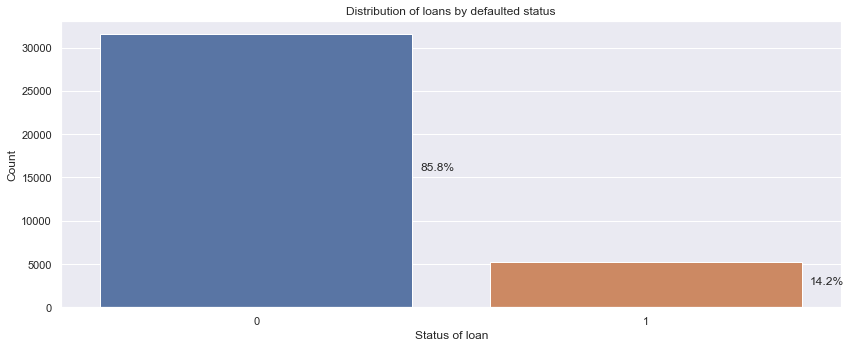

In [37]:
univariate_analysis('loan_defaulted',
                    is_categorical=True,
                    title="Distribution of loans by defaulted status",
                    xlabel="Status of loan",
                    ylabel="Count")

#### We can see that almost 14% loans defaulted.

In [38]:
loans['term'].value_counts()

 36 months    27496
 60 months     9239
Name: term, dtype: int64

In [39]:
loans['term'] = loans['term'].str.strip()

As we can see `term` has two values. `term` is a ordinal categorical variable. We can create a new column `is_short_term` which will have *1* for `36 months` and *0* for `60 months`

In [40]:
loans['is_short_term'] = loans['term'].apply(lambda x : 1 if x == '36 months' else 0)

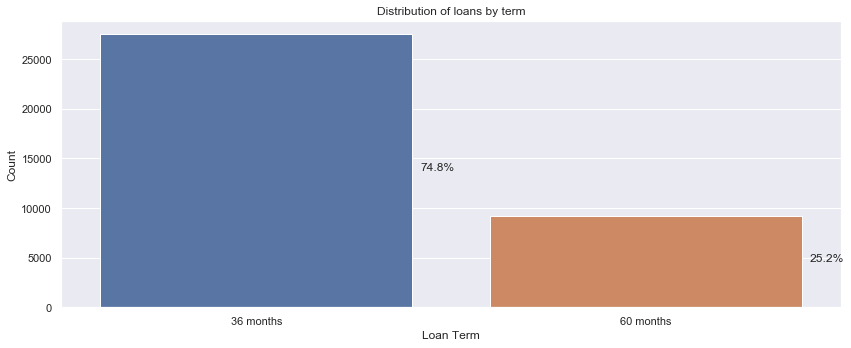

In [41]:
univariate_analysis('term',
                    is_categorical=True,
                    title="Distribution of loans by term",
                    xlabel="Loan Term",
                    ylabel="Count")

From the plot, we can see that short term loans (36 months) are the most given loans

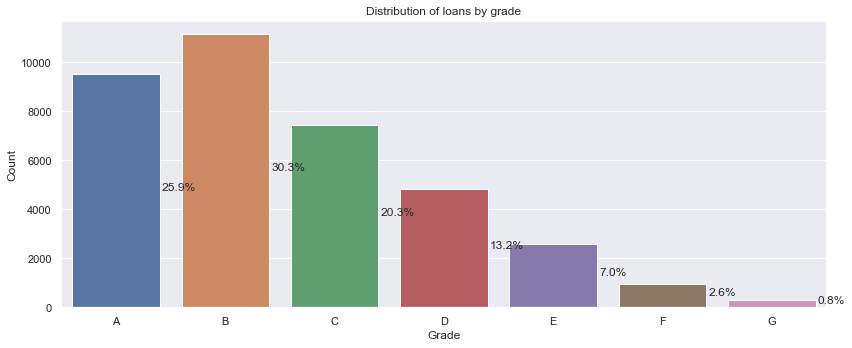

In [42]:
univariate_analysis('grade',
                    is_categorical=True,
                    title="Distribution of loans by grade",
                    xlabel="Grade",
                    ylabel="Count")

We can see that type B grade loans are the most given loans. We can also see that the loans are given based on grades.

We are not doing univariate analysis of sub grades as we already did analysis on the grades. We will do multi variate analysis for sub grades based on grades against the defaulted loans.

In [43]:
loans['emp_length'].value_counts()

10+ years    8359
< 1 year     4322
2 years      4194
3 years      3940
4 years      3283
5 years      3147
1 year       3062
6 years      2132
7 years      1685
8 years      1405
9 years      1206
Name: emp_length, dtype: int64

As we can, `emp_length` has 11 distinct values, this can be treated as ordinal categorical variable

In [44]:
loans['emp_length'] = loans['emp_length'].apply(
    lambda x: x.replace(' years', "").replace(' year', "").replace(
        "+", "").replace("< 1", "0")).astype(int)

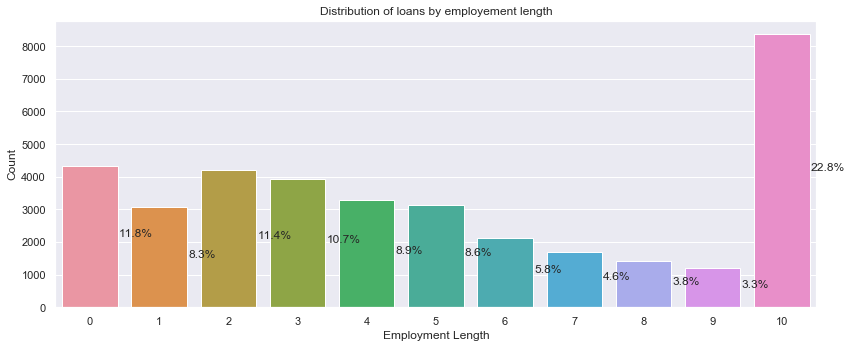

In [45]:
univariate_analysis('emp_length',
                    is_categorical=True,
                    title="Distribution of loans by employement length",
                    xlabel="Employment Length",
                    ylabel="Count")

We can see the people having experience more that 10 are the ones availing the most loans

However, we can get more insight, if we create a new variable based on `emp_length` which has values like `junior`, `mid-level` and `senior`

In [46]:
def add_categorical_column(df,
                           bins,
                           column,
                           new_column,
                           interval,
                           verbose=False):
    interval.append(df[column].max() + 1)
    df[new_column] = pd.cut(df[column], interval, right=False, labels=bins)
    if verbose:
        print(df[[column, new_column]].head())

In [47]:
add_categorical_column(loans, ['junior', 'mid-level', 'senior'], 'emp_length',
                       'emp_exp', [0, 4, 8])

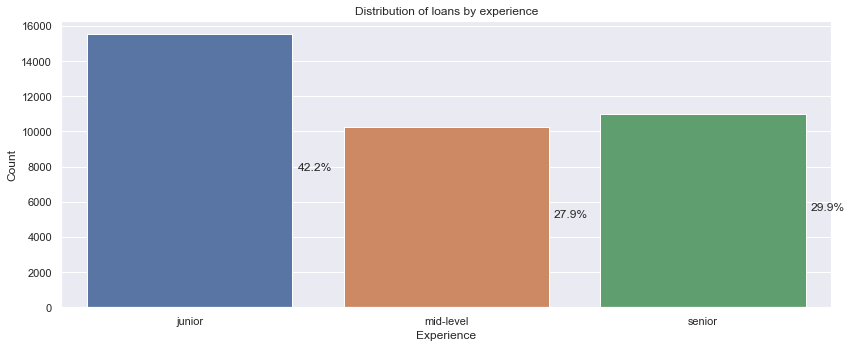

In [48]:
univariate_analysis('emp_exp',
                    is_categorical=True,
                    title="Distribution of loans by experience",
                    xlabel="Experience",
                    ylabel="Count")

We can say on a higher level that junior level employees have taken more loans.

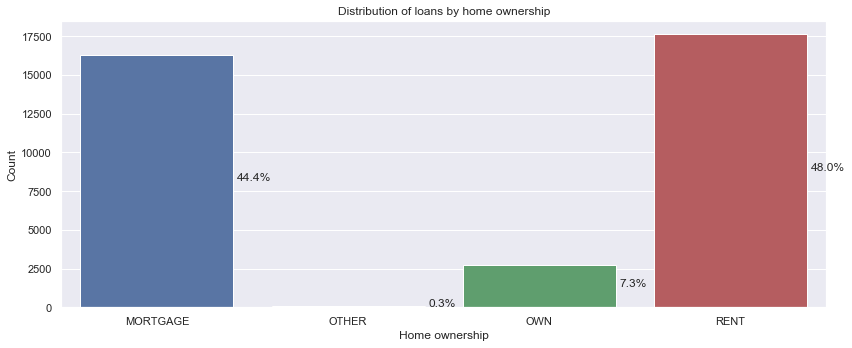

In [49]:
univariate_analysis('home_ownership',
                    is_categorical=True,
                    title="Distribution of loans by home ownership",
                    xlabel="Home ownership",
                    ylabel="Count")

People with rented house have opted for the most loans

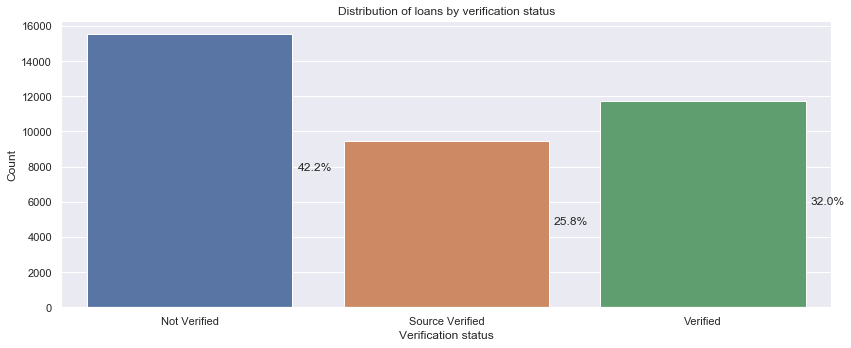

In [50]:
univariate_analysis('verification_status',
                    is_categorical=True,
                    title="Distribution of loans by verification status",
                    xlabel="Verification status",
                    ylabel="Count")

We can see that most loans are given without any verification.

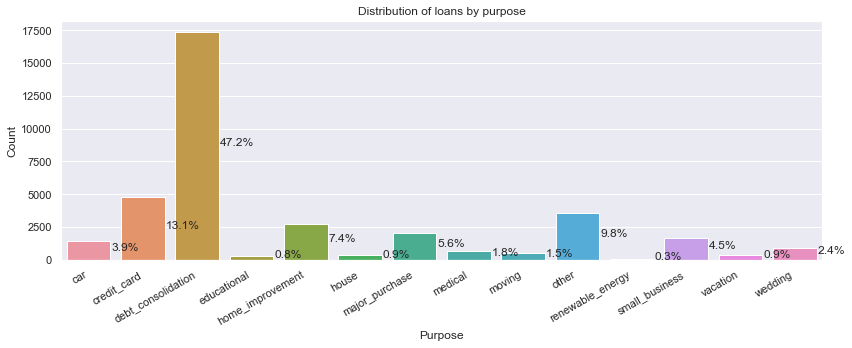

In [51]:
univariate_analysis('purpose',
                    is_categorical=True,
                    title="Distribution of loans by purpose",
                    xlabel="Purpose",
                    ylabel="Count",
                    rotate_labels=True)

## We can see most loans are for `debt consolidation` followed by `credit card`. `Purpose` is an important variable for a loan which comes from business knowledge so will be using `Purpose` for the multivariate analysis. As we did in investment analysis assignment, we will take top 5 purposes.
- debt consolidation
- credit card
- other 
- home improvement
- major purchase

In [52]:
top_purposes = [
    'debt_consolidation', 'credit_card', 'other', 'home_improvement',
    'major_purchase'
]

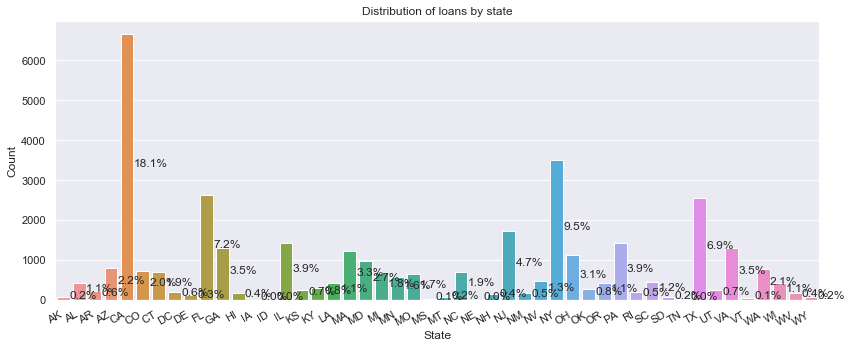

In [53]:
univariate_analysis('addr_state',
                    is_categorical=True,
                    title="Distribution of loans by state",
                    xlabel="State",
                    ylabel="Count",
                    rotate_labels=True)

##### We can see most loans are taken in California (CA) followed by New York (NY)

We will do bivariate analysis on `delinq_2yrs`, `inq_last_6mths`, `pub_rec_bankruptcies` with the `loan_status`.

### Continuous variables

In [54]:
loans_continuous = loans[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'open_acc', 'revol_bal', 'revol_util']]
loans_continuous.describe()

loan_amnt  funded_amnt  funded_amnt_inv  installment   annual_inc  \
count 36735.0000   36735.0000       36735.0000   36735.0000   36735.0000   
mean  11153.4531   10884.2317       10444.7007     324.9947   69468.9407   
std    7368.3826    7107.2998        7008.0288     208.8390   64063.8854   
min     500.0000     500.0000           0.0000      16.0800    4000.0000   
25%    5500.0000    5425.0000        5000.0000     167.7300   41200.0000   
50%   10000.0000    9600.0000        9000.0000     280.2800   60000.0000   
75%   15000.0000   15000.0000       14353.3263     429.4500   83000.0000   
max   35000.0000   35000.0000       35000.0000    1305.1900 6000000.0000   

             dti   open_acc   revol_bal  
count 36735.0000 36735.0000  36735.0000  
mean     13.3371     9.3058  13384.8863  
std       6.6496     4.3760  15856.3133  
min       0.0000     2.0000      0.0000  
25%       8.2200     6.0000   3734.5000  
50%      13.4300     9.0000   8880.0000  
75%      18.5900    12.0000  17035.5000  
max      29.9900    44.0000 149588.0000

count   36735.0000
mean    11153.4531
std      7368.3826
min       500.0000
25%      5500.0000
50%     10000.0000
75%     15000.0000
max     35000.0000
Name: loan_amnt, dtype: float64


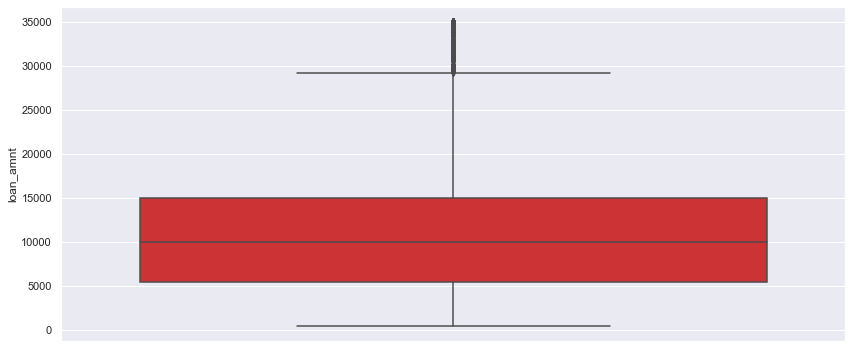

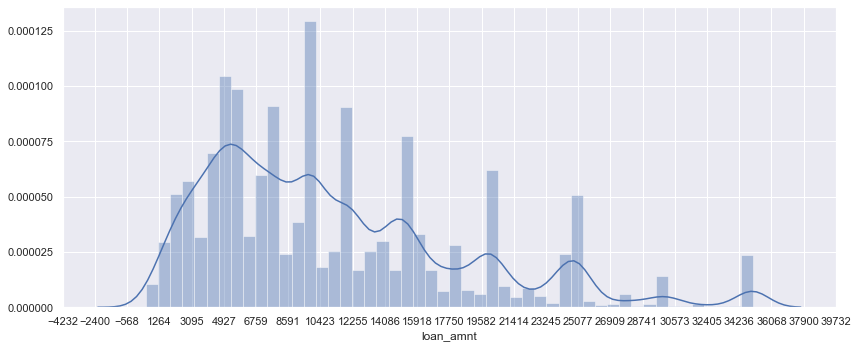

In [55]:
univariate_analysis('loan_amnt')

As we can see there are some outliers in the `loan_amnt`. However, we can't remove these as they may be the defaulted one. We can create a new categorical column `loan_amnt_type` which categorizes the loans as **low, medium and high**

In [56]:
add_categorical_column(loans, ['low', 'medium', 'high'], 'loan_amnt',
                       'loan_amnt_type', [0, 5000, 15000])

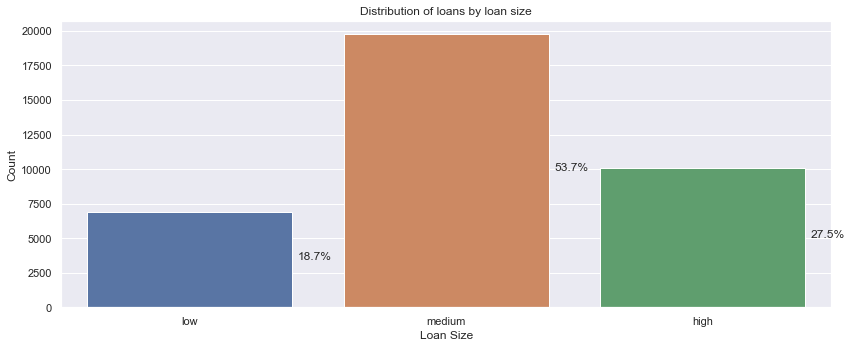

In [57]:
univariate_analysis('loan_amnt_type',
                    is_categorical=True,
                    title="Distribution of loans by loan size",
                    xlabel="Loan Size",
                    ylabel="Count",
                    rotate_labels=False)

### From this, we can infer that `medium` type loans are the most given loans by Lending club

count   36735.0000
mean    10884.2317
std      7107.2998
min       500.0000
25%      5425.0000
50%      9600.0000
75%     15000.0000
max     35000.0000
Name: funded_amnt, dtype: float64


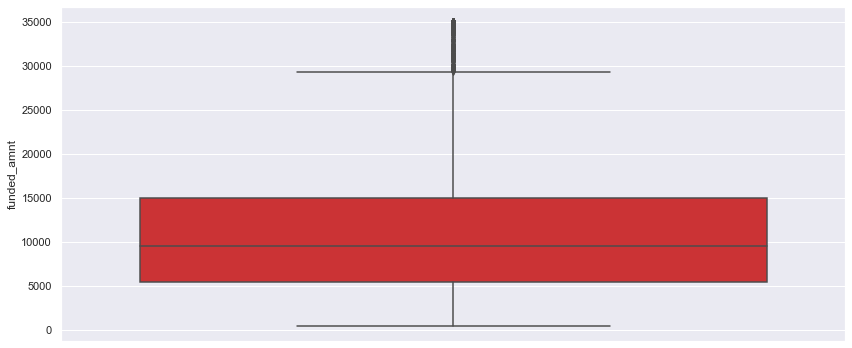

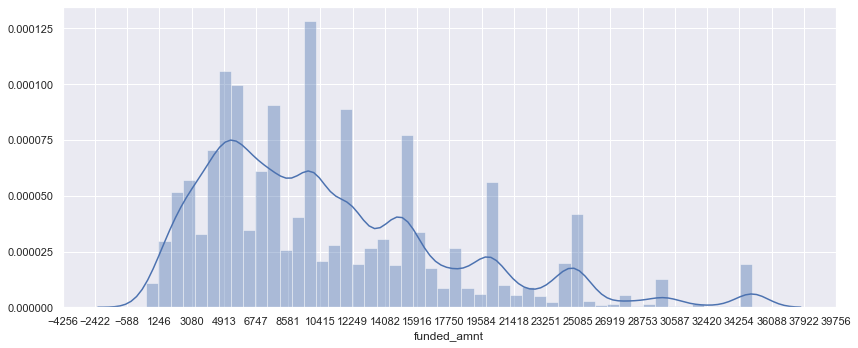

In [58]:
univariate_analysis('funded_amnt')

As we can see there are some outliers in the `funded_amnt`. However, we can't remove these as they may be the defaulted one. We can create a new categorical column `funded_amnt_type` which categorizes the loans as **low, medium and high**

In [59]:
add_categorical_column(loans, ['low', 'medium', 'high'], 'funded_amnt',
                       'funded_amnt_type', [0, 5000, 15000])

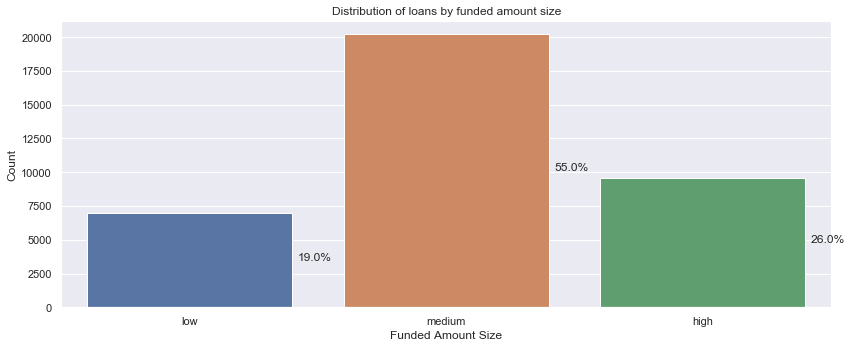

In [60]:
univariate_analysis('funded_amnt_type',
                    is_categorical=True,
                    title="Distribution of loans by funded amount size",
                    xlabel="Funded Amount Size",
                    ylabel="Count",
                    rotate_labels=False)

The plot shows that the medium funded loans are the most in the count

count   36735.0000
mean    10444.7007
std      7008.0288
min         0.0000
25%      5000.0000
50%      9000.0000
75%     14353.3263
max     35000.0000
Name: funded_amnt_inv, dtype: float64


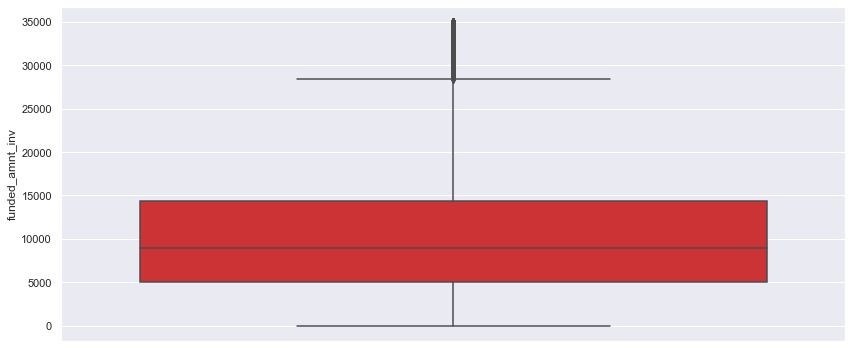

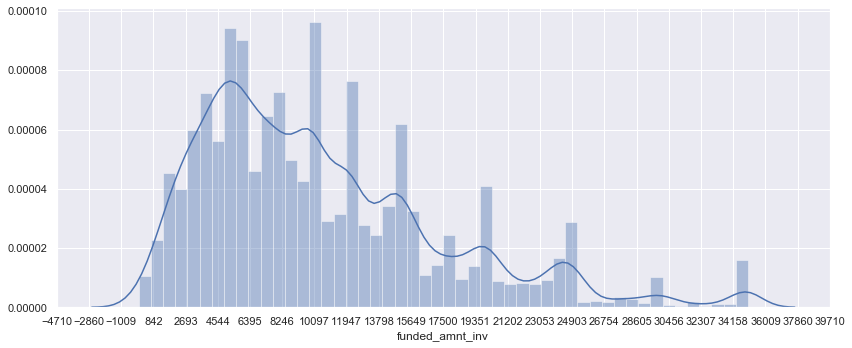

In [61]:
univariate_analysis('funded_amnt_inv')

As we can see there are some outliers in the `funded_amnt_inv`. However, we can't remove these as they may be the defaulted one. We can create a new categorical column `funded_amnt_inv_type` which categorizes the loans as **low, medium and high**

In [62]:
add_categorical_column(loans, ['low', 'medium', 'high'], 'funded_amnt_inv',
                       'funded_amnt_inv_type', [0, 5000, 15000])

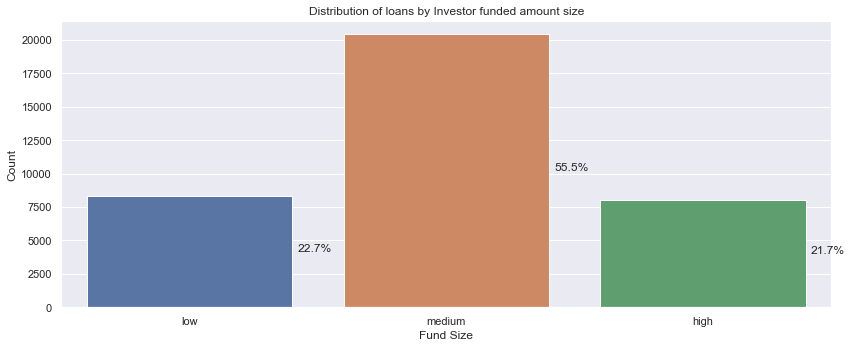

In [63]:
univariate_analysis('funded_amnt_inv_type', is_categorical=True,
                    title="Distribution of loans by Investor funded amount size",
                    xlabel="Fund Size",
                    ylabel="Count",
                    rotate_labels=False)

The plot shows that the investors have funded the `medium` type loans the most.

In [64]:
loans['int_rate'] = loans['int_rate'].str.replace('%',"").astype(float)

count   36735.0000
mean       11.9805
std         3.7012
min         5.4200
25%         8.9400
50%        11.8300
75%        14.4600
max        24.4000
Name: int_rate, dtype: float64


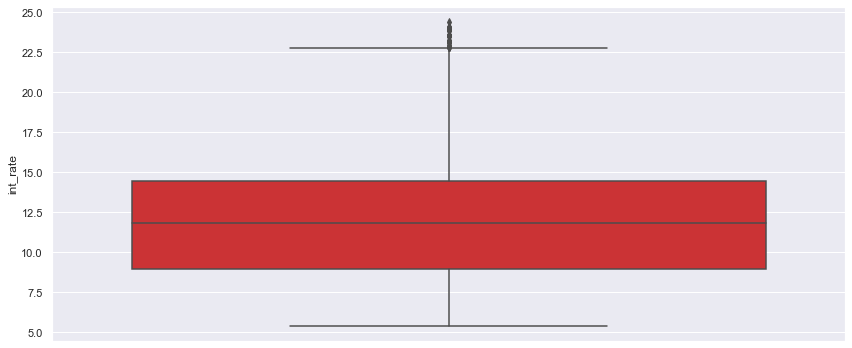

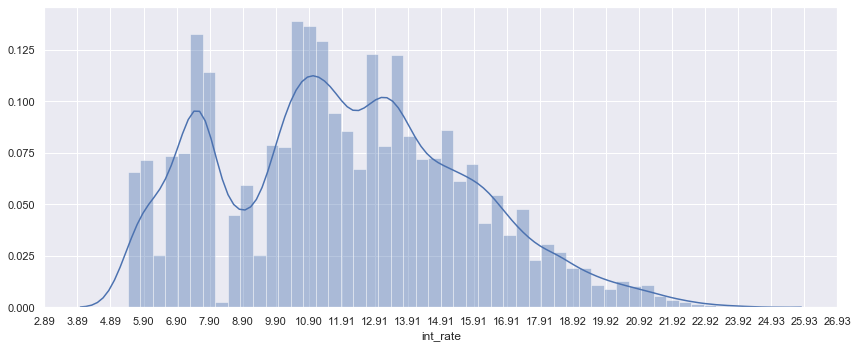

In [65]:
univariate_analysis('int_rate')

In [66]:
add_categorical_column(loans,
                       ['very-low', 'low', 'medium', 'high', 'very-high'],
                       'int_rate', 'int_rate_slab',
                       [0.0, 6.0, 10.0, 14.0, 18.0])

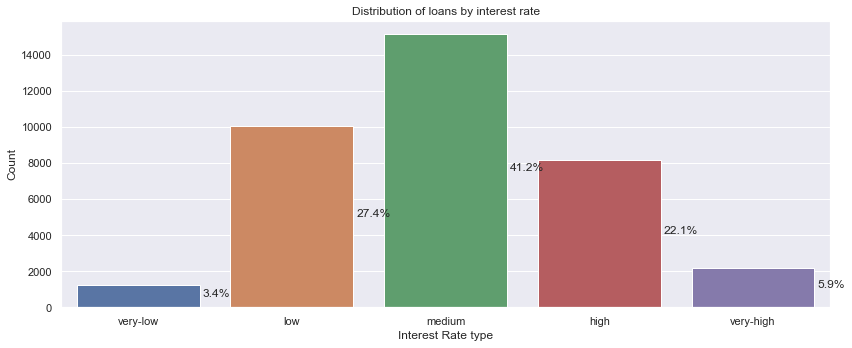

In [67]:
univariate_analysis('int_rate_slab', is_categorical=True,
                    title="Distribution of loans by interest rate",
                    xlabel="Interest Rate type",
                    ylabel="Count",
                    rotate_labels=False)

### As we can see that the most loan have interest range between `10.0` to `14.0`

count     36735.0000
mean      69468.9407
std       64063.8854
min        4000.0000
25%       41200.0000
50%       60000.0000
75%       83000.0000
max     6000000.0000
Name: annual_inc, dtype: float64


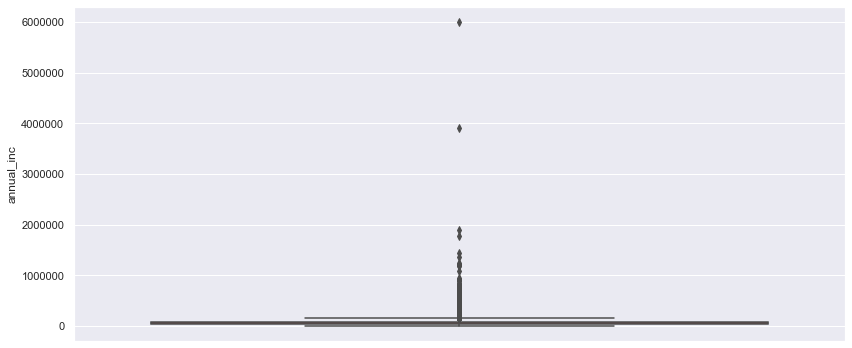

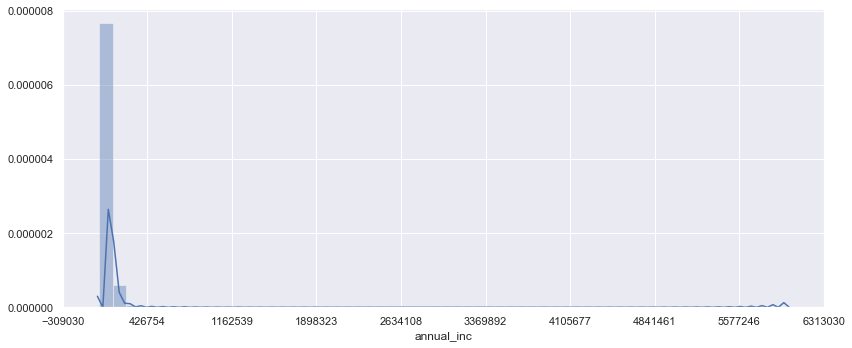

In [68]:
univariate_analysis('annual_inc',bins=10)

As we can see there are some outliers in the `annual_inc`. However, we can't remove these as they may be the defaulted one. We can create a new categorical column `income_category` which categorizes the annual income as **low, middle, upper-middle and rich**

In [69]:
add_categorical_column(loans, ['low', 'middle', 'upper-middle', 'rich'],
                       'annual_inc', 'income_category',
                       [0.0, 30000.0, 80000.0, 150000.0])

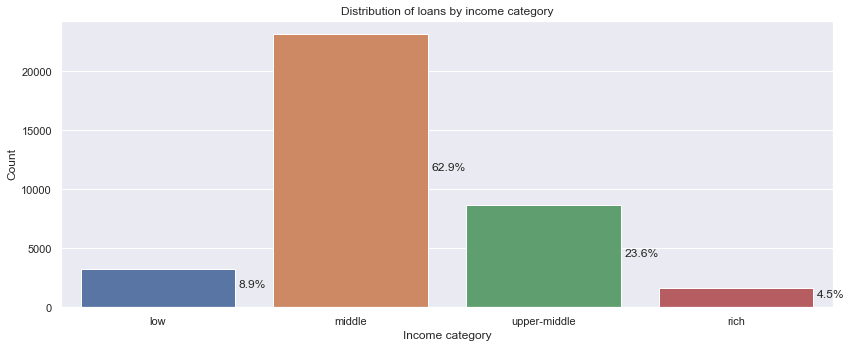

In [70]:
univariate_analysis('income_category', is_categorical=True,
                    title="Distribution of loans by income category",
                    xlabel="Income category",
                    ylabel="Count",
                    rotate_labels=False)

We can see that most loans are taken by the `middle` class followed by `upper middle` class

In [71]:
loans['issue_d'].describe()

count      36735
unique        51
top       Dec-11
freq        1993
Name: issue_d, dtype: object

Let us create a new derived variable `loan_issue_year` and `loan_issue_month` from `issue_d`

In [72]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'], format='%b-%y')

loans['loan_issue_year'] = loans['issue_d'].dt.year
loans['loan_issue_month'] = loans['issue_d'].dt.month


In [73]:
loans['loan_issue_year'].value_counts()

2011    19759
2010    11179
2009     4688
2008     1104
2007        5
Name: loan_issue_year, dtype: int64

In [74]:
loans['loan_issue_month'].value_counts()

12    4031
11    3843
10    3578
9     3364
8     3279
7     3210
6     3081
5     2831
4     2750
3     2503
1     2159
2     2106
Name: loan_issue_month, dtype: int64

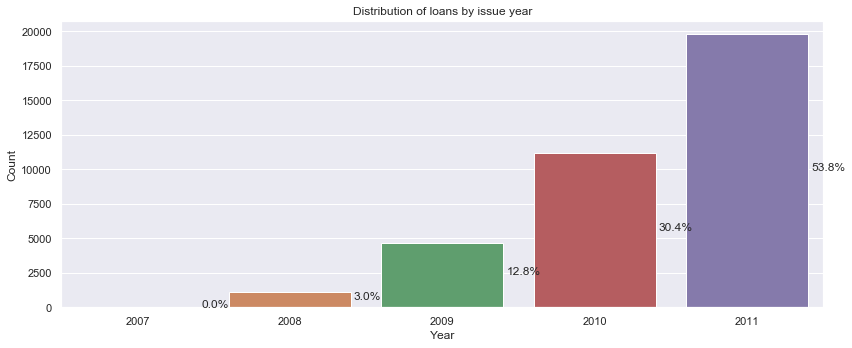

In [75]:
univariate_analysis('loan_issue_year',
                    is_categorical=True,
                    title="Distribution of loans by issue year",
                    xlabel="Year",
                    ylabel="Count",
                    rotate_labels=False)

We can see that the most (almost half) loans are given in **2011** followed by **2010**

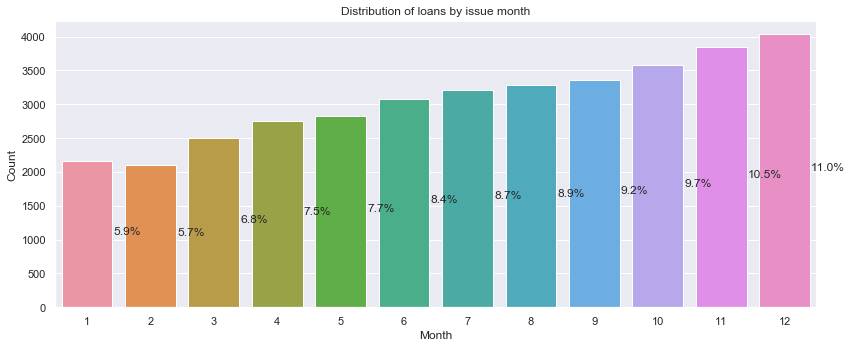

In [76]:
univariate_analysis('loan_issue_month',
                    is_categorical=True,
                    title="Distribution of loans by issue month",
                    xlabel="Month",
                    ylabel="Count",
                    rotate_labels=False)

We can see that maximum number of loans are given in Dec followed by Nov and so on. 

count   36735.0000
mean       13.3371
std         6.6496
min         0.0000
25%         8.2200
50%        13.4300
75%        18.5900
max        29.9900
Name: dti, dtype: float64


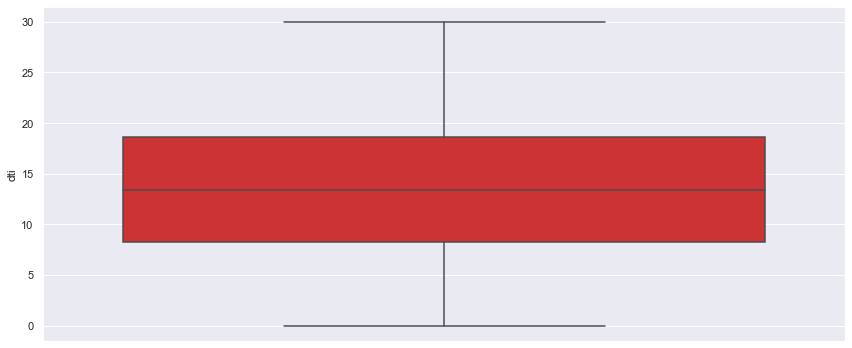

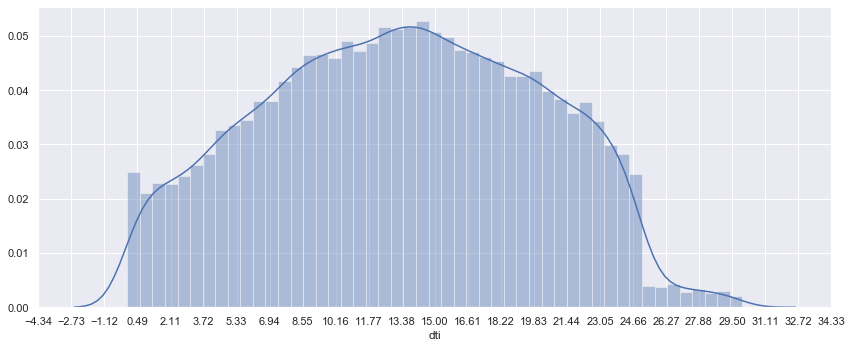

In [77]:
univariate_analysis('dti')

As we can `dti` follows a normal distribution, however, to get better insights we will create new columns based on a range. More details for `dti` check here https://www.investopedia.com/terms/d/dti.asp

In [78]:
add_categorical_column(loans,
                       [ 'low', 'medium', 'high'],
                       'dti', 'dti_category',
                       [0.0, 10.0, 20.0])

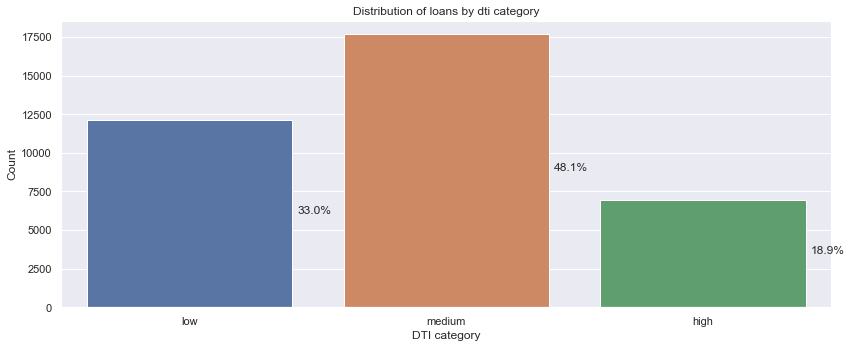

In [79]:
univariate_analysis('dti_category',
                    is_categorical=True,
                    title="Distribution of loans by dti category",
                    xlabel="DTI category",
                    ylabel="Count",
                    rotate_labels=False)

As we can see, most of the borrowers have the `dti` ratio in the medium range.

count   36735.0000
mean        9.3058
std         4.3760
min         2.0000
25%         6.0000
50%         9.0000
75%        12.0000
max        44.0000
Name: open_acc, dtype: float64


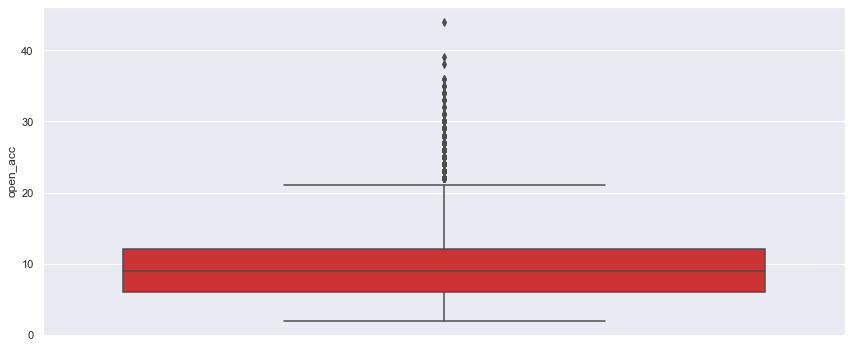

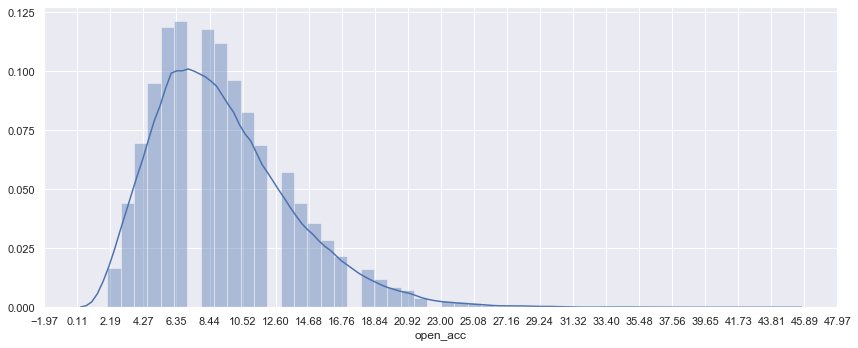

In [80]:
univariate_analysis('open_acc')

As we can see here that there are some outliers here. We can mitigate their impact by creating a new variable which has a range.

In [81]:
add_categorical_column(loans,
                       [ 'low', 'medium', 'high'],
                       'open_acc', 'open_accounts_category',
                       [0.0, 8.0, 16.0])

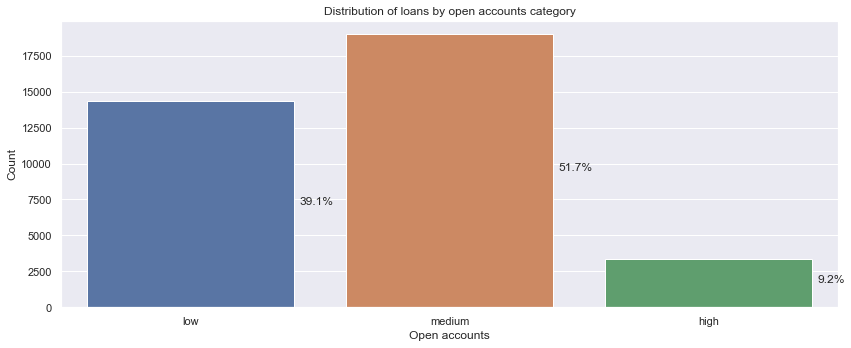

In [82]:
univariate_analysis('open_accounts_category',
                    is_categorical=True,
                    title="Distribution of loans by open accounts category",
                    xlabel="Open accounts",
                    ylabel="Count",
                    rotate_labels=False)

We can see most borrowers have open accounts in the medium range.

count    36735.0000
mean     13384.8863
std      15856.3133
min          0.0000
25%       3734.5000
50%       8880.0000
75%      17035.5000
max     149588.0000
Name: revol_bal, dtype: float64


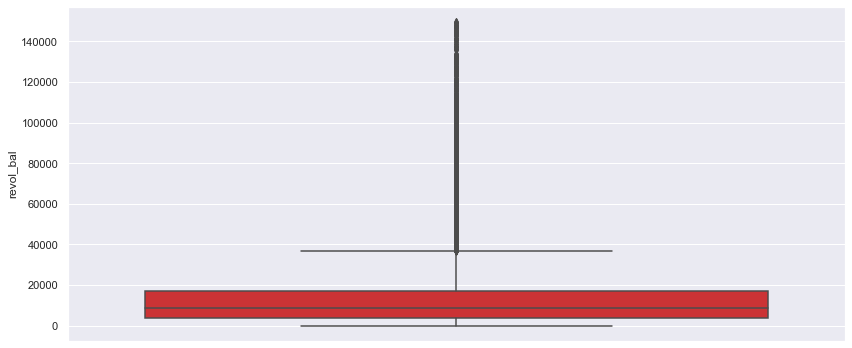

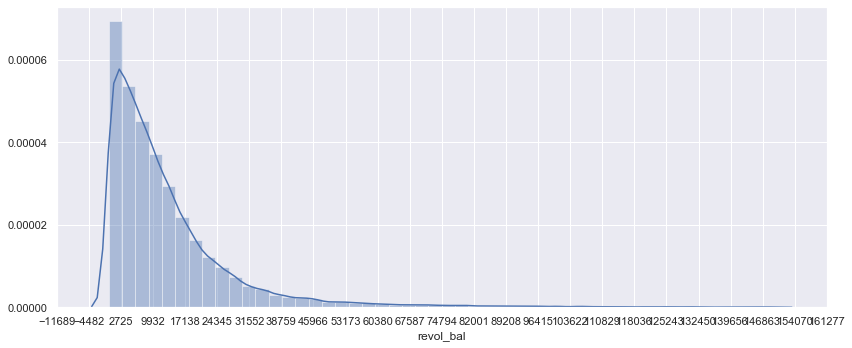

In [83]:
univariate_analysis('revol_bal')

As we can revol_bal has some outliers, we will create a new column to mitigate this.

In [84]:
add_categorical_column(loans,
                       [ 'low', 'medium', 'high'],
                       'revol_bal', 'revol_bal_category',
                       [0.0, 8000.0, 16000.0])

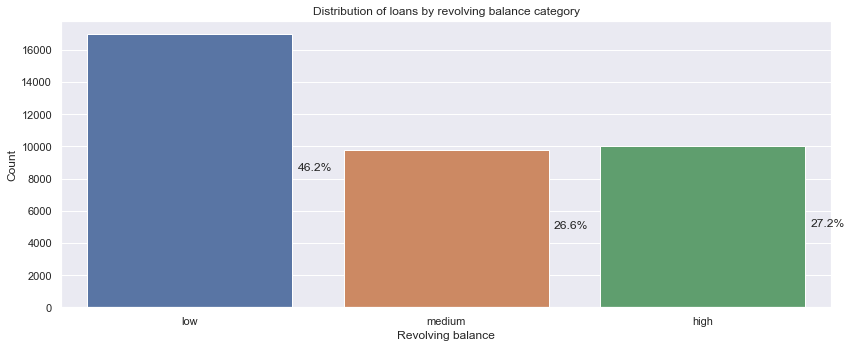

In [85]:
univariate_analysis('revol_bal_category',
                    is_categorical=True,
                    title="Distribution of loans by revolving balance category",
                    xlabel="Revolving balance",
                    ylabel="Count",
                    rotate_labels=False)

We can see that most of the borrowers have low revolving balance.

In [86]:
loans['revol_util'] = loans['revol_util'].str.replace('%',"").astype(float)

count   36735.0000
mean       48.9918
std        28.3137
min         0.0000
25%        25.6000
50%        49.5000
75%        72.5000
max        99.9000
Name: revol_util, dtype: float64


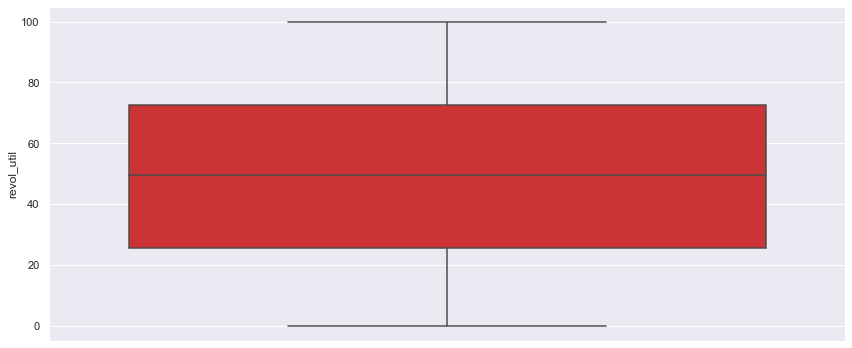

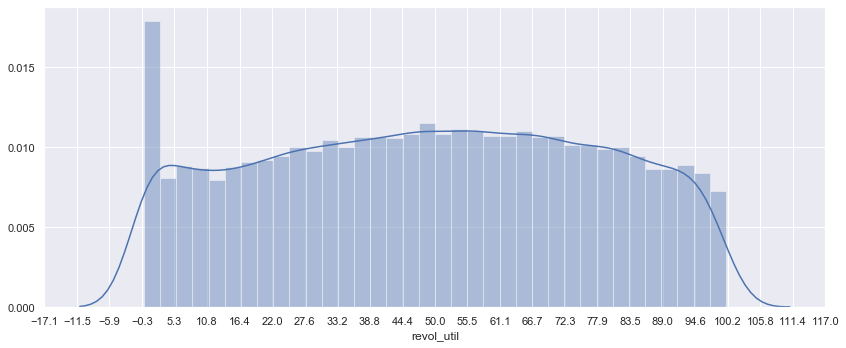

In [87]:
univariate_analysis('revol_util')

As we can `revol_util` follows a normal distribution, however, to get better insights we will create new columns based on a range. More details for `revol_util` check here https://www.investopedia.com/terms/c/credit-utilization-rate.asp

In [88]:
add_categorical_column(loans,
                       [ 'low', 'medium', 'high'],
                       'revol_util', 'revol_util_category',
                       [0.0, 30.0, 60.0])

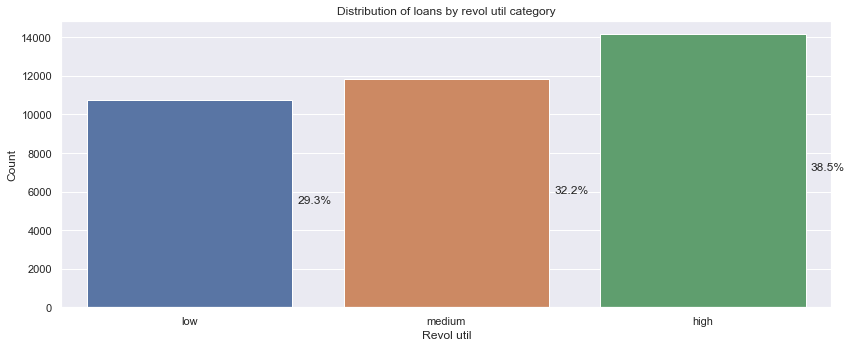

In [89]:
univariate_analysis('revol_util_category',
                    is_categorical=True,
                    title="Distribution of loans by revol util category",
                    xlabel="Revol util",
                    ylabel="Count",
                    rotate_labels=False)

We can see almost 38% borrowers have high revol util (Credit Utilization Ratio)

count   36735.0000
mean      324.9947
std       208.8390
min        16.0800
25%       167.7300
50%       280.2800
75%       429.4500
max      1305.1900
Name: installment, dtype: float64


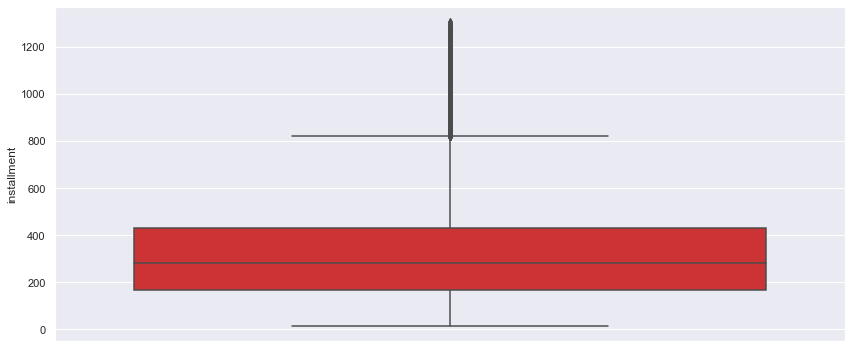

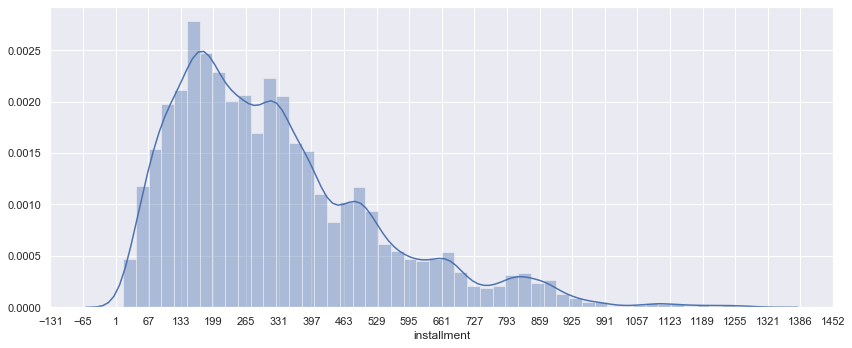

In [90]:
univariate_analysis('installment')

There are some outliers, to mitigate this we can create new category.

In [91]:
add_categorical_column(loans,
                       [ 'low', 'medium', 'high'],
                       'installment', 'installment_category',
                       [0.0, 200.0, 400.0])

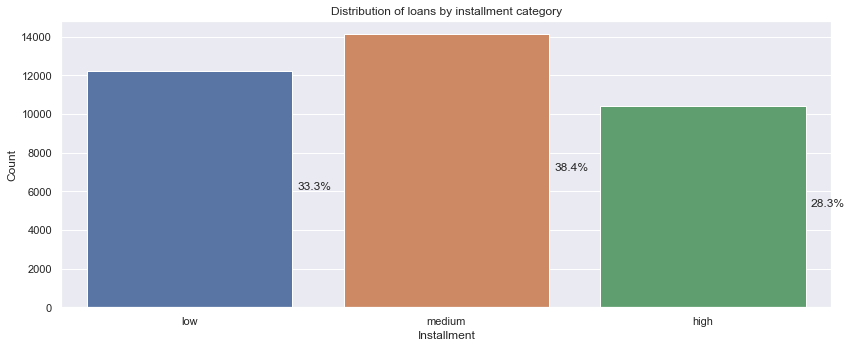

In [92]:
univariate_analysis('installment_category',
                    is_categorical=True,
                    title="Distribution of loans by installment category",
                    xlabel="Installment",
                    ylabel="Count",
                    rotate_labels=False)

We can see most of the loans have medium installments.

# Segmented univariate analysis

We can analyze the income for records with grade as `B`.

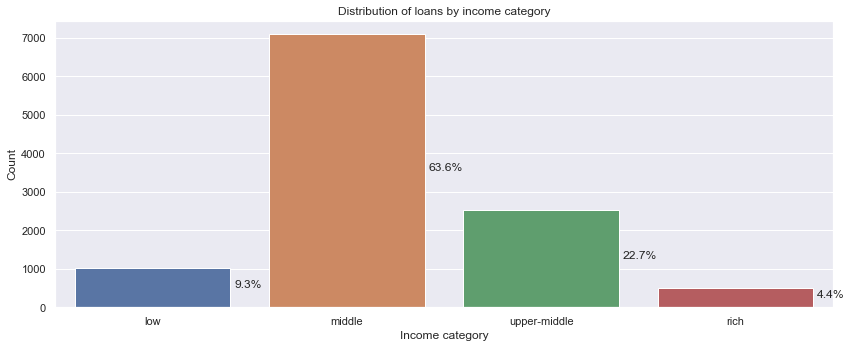

In [93]:
univariate_analysis('income_category',
                    is_categorical=True,
                    title="Distribution of loans by income category",
                    xlabel="Income category",
                    ylabel="Count",
                    rotate_labels=False,df=loans[loans['grade']=='B'][['income_category']])

We can see that middle class income borrowers constitute the most in the loans with grade `B`

We will analyze employee experience for short term loans 

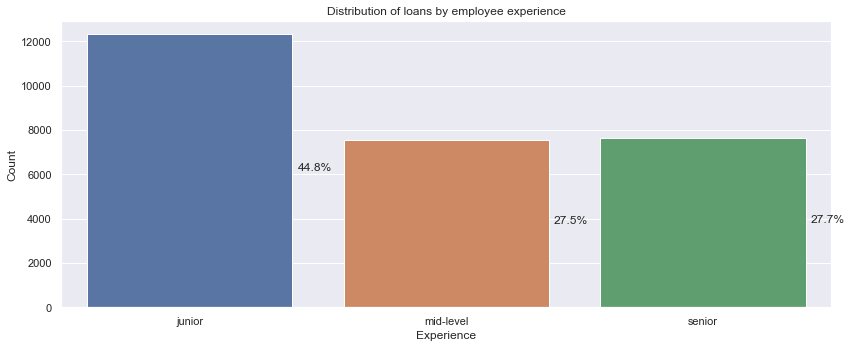

In [94]:
univariate_analysis('emp_exp',
                    is_categorical=True,
                    title="Distribution of loans by employee experience",
                    xlabel="Experience",
                    ylabel="Count",
                    rotate_labels=False,df=loans[loans['term']=='36 months'][['emp_exp']])

We will analyze employee experience for long term loans 

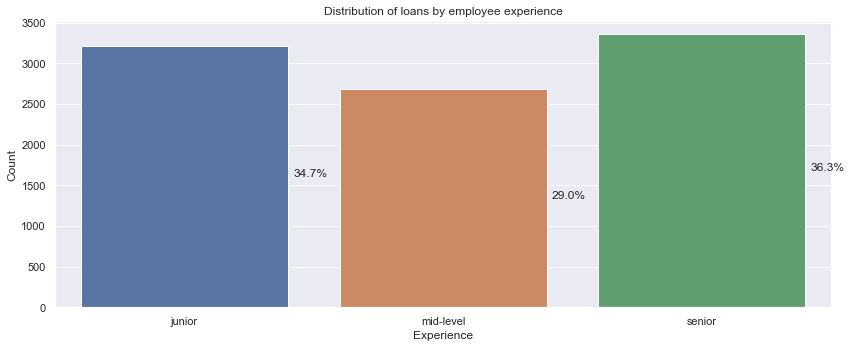

In [95]:
univariate_analysis('emp_exp',
                    is_categorical=True,
                    title="Distribution of loans by employee experience",
                    xlabel="Experience",
                    ylabel="Count",
                    rotate_labels=False,df=loans[loans['term']=='60 months'][['emp_exp']])

We will analyze defaulted short term loans. 

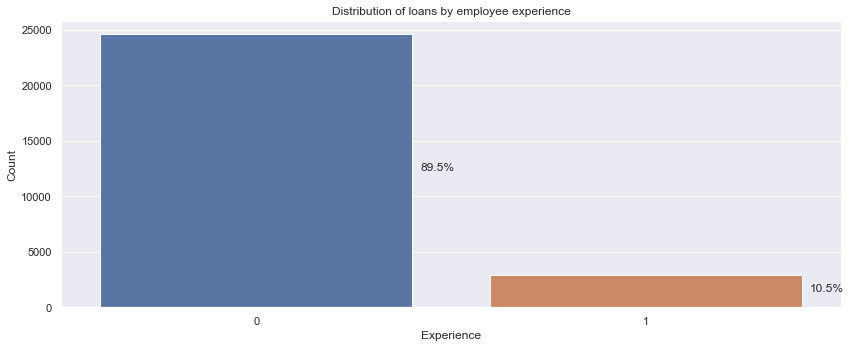

In [96]:
univariate_analysis('loan_defaulted',
                    is_categorical=True,
                    title="Distribution of loans by employee experience",
                    xlabel="Experience",
                    ylabel="Count",
                    rotate_labels=False,
                    df=loans[loans['term'] == '36 months'][['loan_defaulted']])

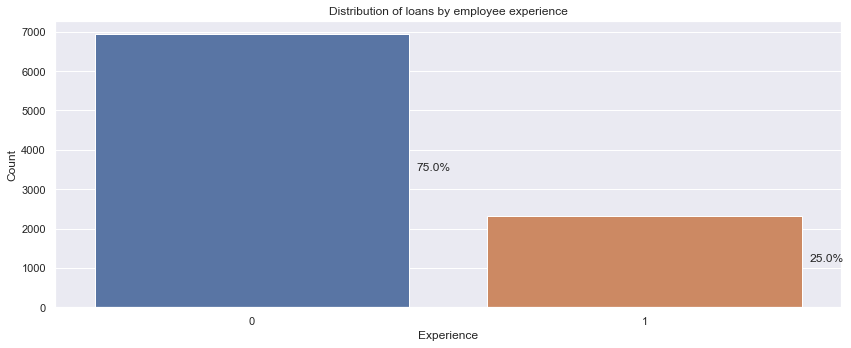

In [97]:
univariate_analysis('loan_defaulted',
                    is_categorical=True,
                    title="Distribution of loans by employee experience",
                    xlabel="Experience",
                    ylabel="Count",
                    rotate_labels=False,
                    df=loans[loans['term'] == '60 months'][['loan_defaulted']])

We can see that long term loans are the most defaulted ones.

# Bivariate analysis

In [98]:
c_palette = ['tab:green', 'tab:red']

In [99]:
def bivariate_analysis(x,
                       hue,
                       df=loans,
                       is_categorical=False,
                       title="",
                       xlabel=None,
                       ylabel=None,
                       rotate_labels=False,
                       bins=25):
    categorical_summarized(df,
                           x=x,
                           hue=hue,
                           palette=c_palette,
                           title=title,
                           xlabel=xlabel,
                           ylabel=ylabel)
    print(pd.crosstab(df[x], df[hue], margins=False))

In [100]:
def bivariate_analysis_v2(x,
                          hue,
                          df=loans,
                          is_categorical=False,
                          title="",
                          xlabel=None,
                          ylabel=None,
                          rotate_labels=False,
                          bins=25):
    colors_list = ['green', 'red']
    temp = loans[[x, hue]]
    temp = pd.crosstab(temp[x], temp[hue], margins=False)

    # Change this line to plot percentages instead of absolute values
    ax = (temp.div(temp.sum(1), axis=0)).plot(kind='bar',
                                              figsize=(15, 4),
                                              width=0.8,
                                              color=colors_list,
                                              edgecolor=None)
    plt.legend(labels=['Non defaulted', 'Defaulted'], fontsize=14)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(fontsize=14)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])

    # Add this loop to add the annotations
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

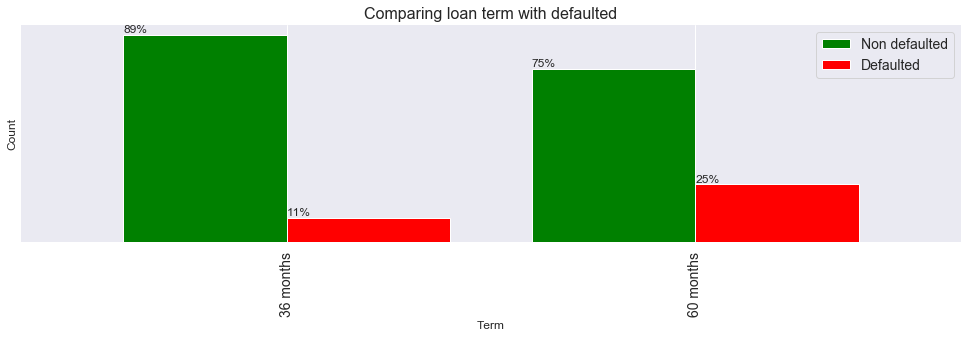

In [101]:
bivariate_analysis_v2('term',
                   'loan_defaulted',
                   title="Comparing loan term with defaulted",
                   xlabel='Term',
                   ylabel='Count')

We can infer that long term loans (60 months) are the most defaulted ones in comparision to the short term loans

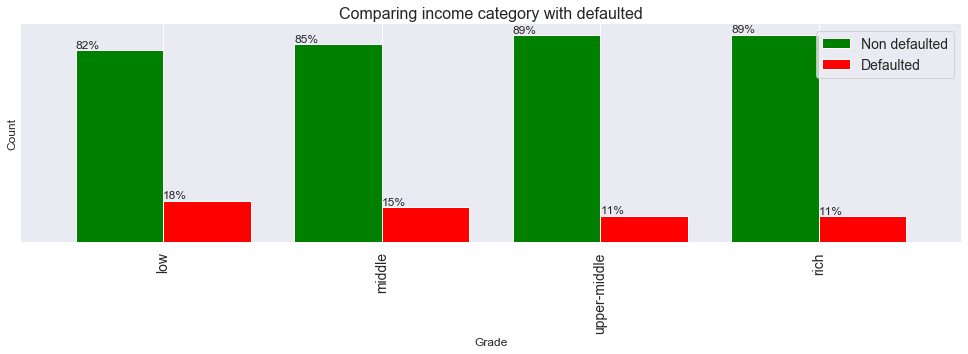

In [102]:
bivariate_analysis_v2('income_category',
                   'loan_defaulted',
                   title="Comparing income category with defaulted",
                   xlabel='Grade',
                   ylabel='Count')

We can see that highest number of defaults are in the low income category

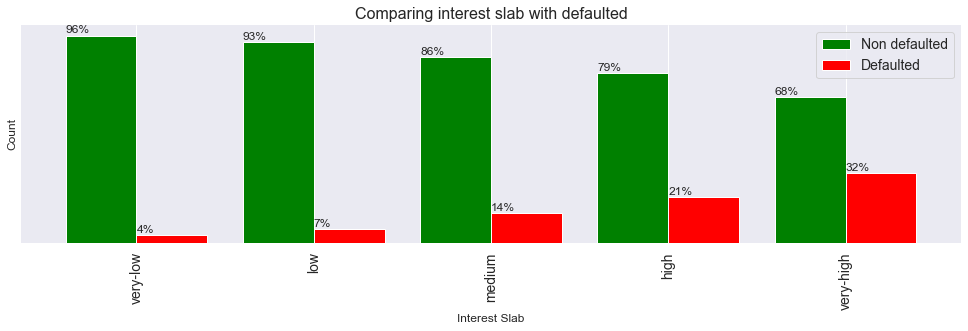

In [103]:
bivariate_analysis_v2('int_rate_slab',
                   'loan_defaulted',
                   title="Comparing interest slab with defaulted",
                   xlabel='Interest Slab',
                   ylabel='Count')

We can see that when the interest rate is increasing, the number of default loans are also increasing

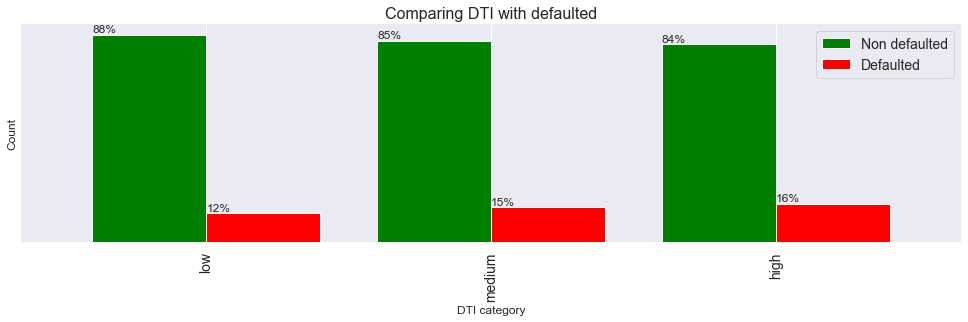

In [104]:
bivariate_analysis_v2('dti_category',
                   'loan_defaulted',
                   title="Comparing DTI with defaulted",
                   xlabel='DTI category',
                   ylabel='Count')

We can see that when the DTI increasing the default loans are also increasing

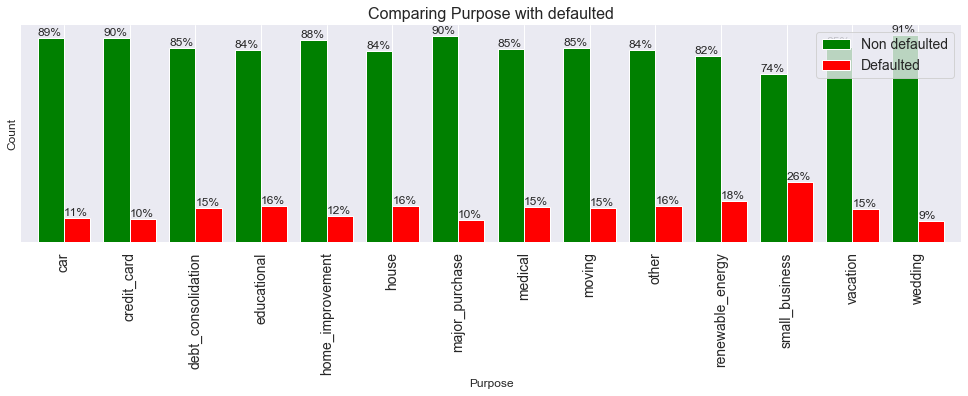

In [105]:
bivariate_analysis_v2('purpose',
                   'loan_defaulted',
                   title="Comparing Purpose with defaulted",
                   xlabel='Purpose',
                   ylabel='Count')

### We can see that `Small Business` are the most defaulted loans followed by `Renewable Energy`

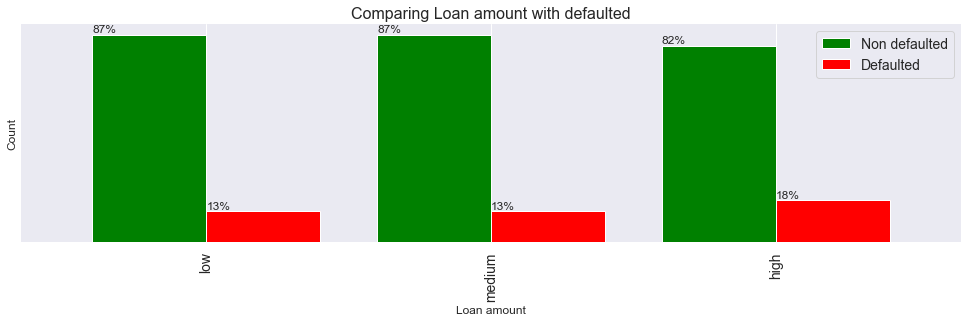

In [106]:
bivariate_analysis_v2('loan_amnt_type',
                   'loan_defaulted',
                   title="Comparing Loan amount with defaulted",
                   xlabel='Loan amount',
                   ylabel='Count')

The loans which have large amount are the most defaulted ones.

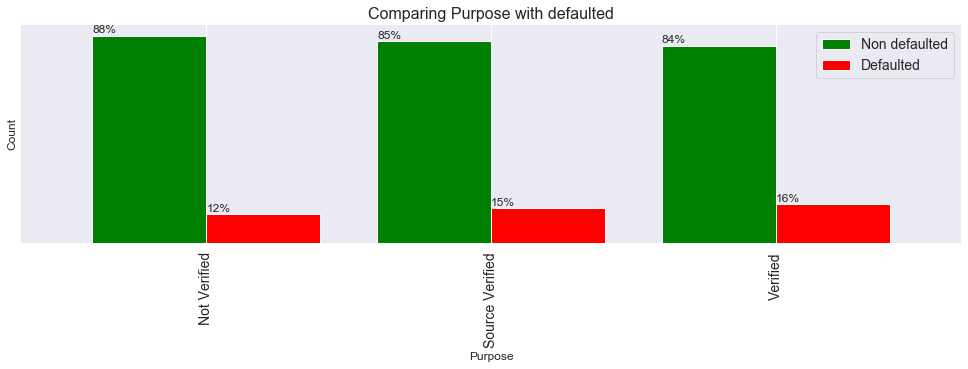

In [107]:
bivariate_analysis_v2('verification_status',
                   'loan_defaulted',
                   title="Comparing Purpose with defaulted",
                   xlabel='Purpose',
                   ylabel='Count')

We can infer that the verified loans are the most defaulted ones.

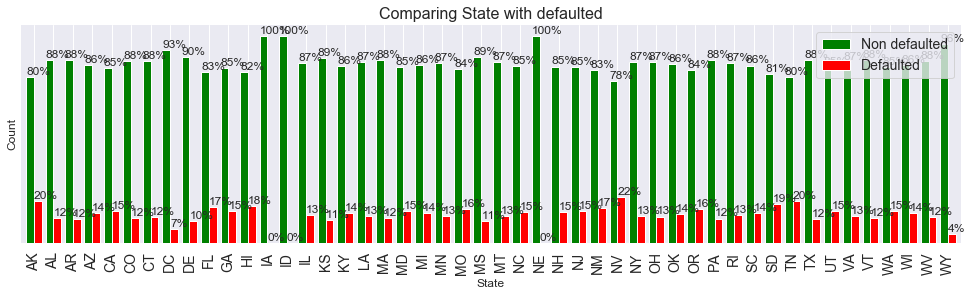

In [108]:
bivariate_analysis_v2('addr_state',
                   'loan_defaulted',
                   title="Comparing State with defaulted",
                   xlabel='State',
                   ylabel='Count')

#### We can see that the most defaulted loans are in Nevada (NV) followed by Alaska (AK) and Tennessee (TN).

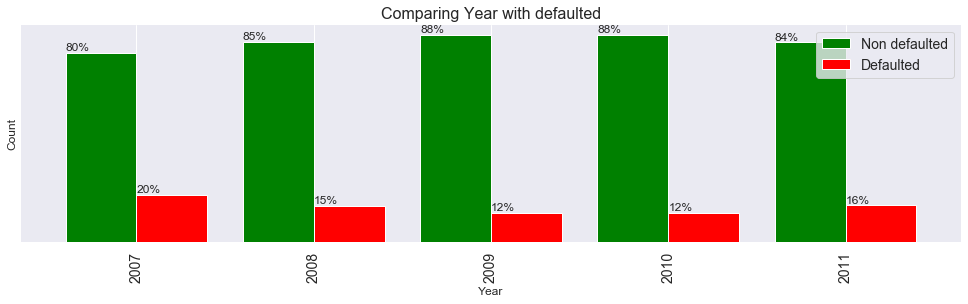

In [109]:
bivariate_analysis_v2('loan_issue_year',
                   'loan_defaulted',
                   title="Comparing Year with defaulted",
                   xlabel='Year',
                   ylabel='Count')

The most defaults were in 2007. After 2007, the defaults started decreasing until 2011, when it again increased

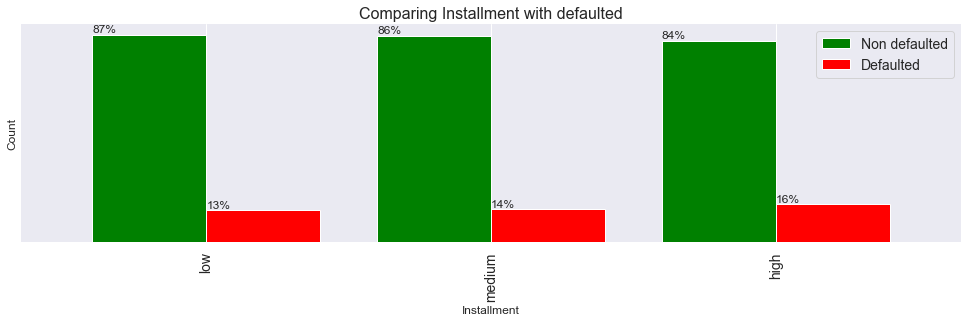

In [110]:
bivariate_analysis_v2('installment_category',
                   'loan_defaulted',
                   title="Comparing Installment with defaulted",
                   xlabel='Installment',
                   ylabel='Count')

### When the installment is high the defaults are also high.

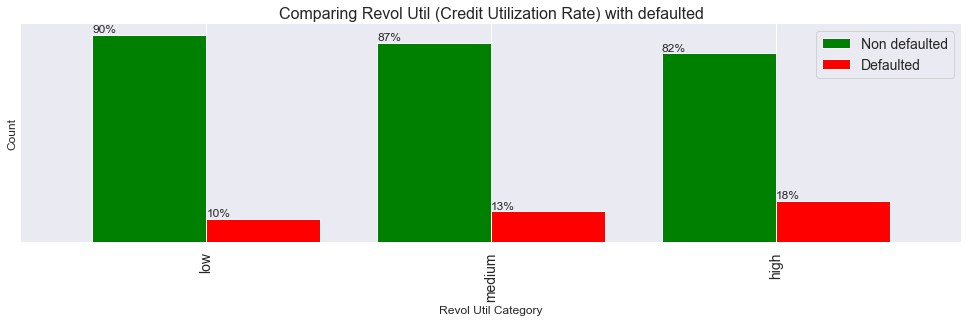

In [111]:
bivariate_analysis_v2('revol_util_category',
                   'loan_defaulted',
                   title="Comparing Revol Util (Credit Utilization Rate) with defaulted",
                   xlabel='Revol Util Category',
                   ylabel='Count')

### When the credit utilization ratio is high, the chances of defaults are also high.

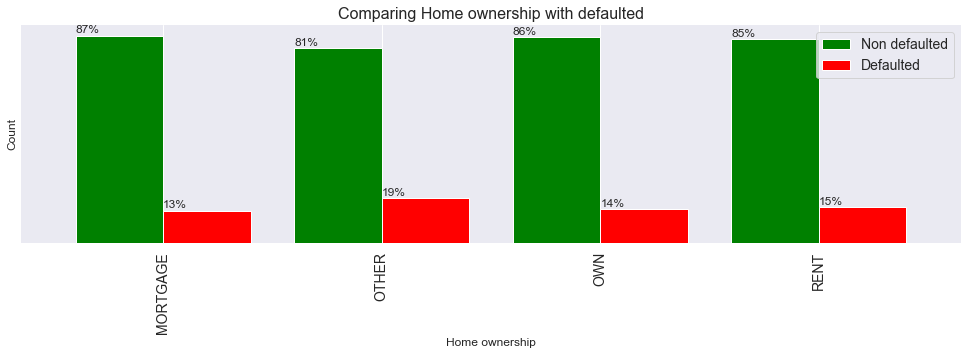

In [112]:
bivariate_analysis_v2('home_ownership',
                   'loan_defaulted',
                   title="Comparing Home ownership with defaulted",
                   xlabel='Home ownership',
                   ylabel='Count')

We can see that the borrowers who do not have proper home ownership are the most defaulters.

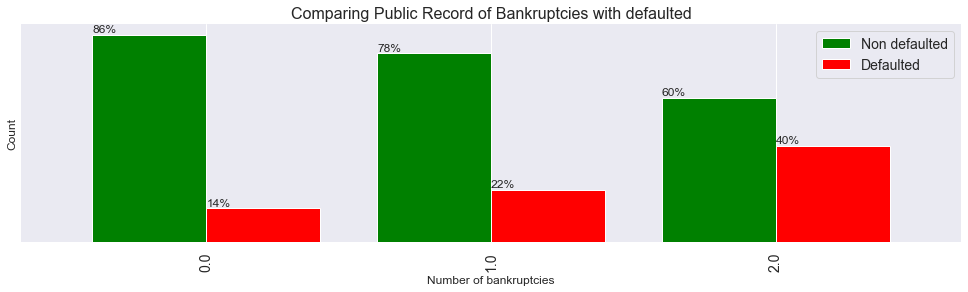

In [113]:
bivariate_analysis_v2('pub_rec_bankruptcies',
                   'loan_defaulted',
                   title="Comparing Public Record of Bankruptcies with defaulted",
                   xlabel='Number of bankruptcies',
                   ylabel='Count')

### We can see that the borrowers with more number of public bankruptcies records are more prone to being the defaulter.

# Multivariate Analysis

## Now, we will filter the data to include only the top purposes for the multivariate analysis

In [114]:
df_top_purposes = loans[loans['purpose'].isin(top_purposes)]

df_top_purposes['purpose'].value_counts()

debt_consolidation    17344
credit_card            4797
other                  3588
home_improvement       2731
major_purchase         2050
Name: purpose, dtype: int64

In [115]:
df_top_purposes.head(5)

loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment  \
0        5000         5000        4975.0000  36 months   10.6500     162.8700   
3       10000        10000       10000.0000  36 months   13.4900     339.3100   
6        7000         7000        7000.0000  60 months   15.9600     170.0800   
9        5375         5375        5350.0000  60 months   12.6900     121.4500   
10       6500         6500        6500.0000  60 months   14.6500     153.4500   

   grade sub_grade  emp_length home_ownership  ...  funded_amnt_inv_type  \
0      B        B2          10           RENT  ...                   low   
3      C        C1          10           RENT  ...                medium   
6      C        C5           8           RENT  ...                medium   
9      B        B5           0           RENT  ...                medium   
10     C        C3           5            OWN  ...                medium   

   int_rate_slab income_category loan_issue_year loan_issue_month  \
0         medium             low            2011               12   
3         medium          middle            2011               12   
6           high          middle            2011               12   
9         medium             low            2011               12   
10          high          middle            2011               12   

   dti_category  open_accounts_category  revol_bal_category  \
0          high                     low              medium   
3          high                  medium                 low   
6          high                     low                high   
9        medium                     low              medium   
10       medium                  medium                 low   

    revol_util_category  installment_category  
0                  high                   low  
3                   low                medium  
6                  high                   low  
9                medium                   low  
10                  low                   low  

[5 rows x 38 columns]

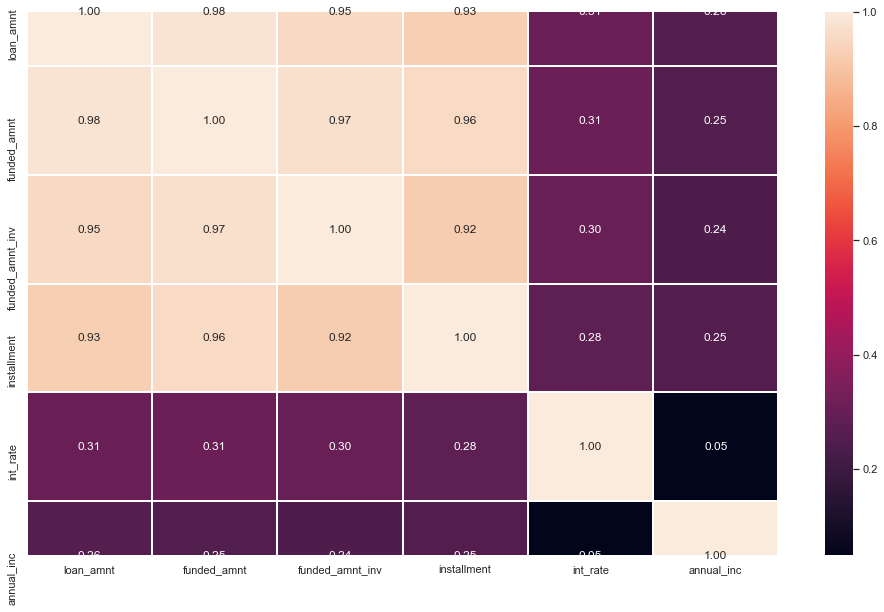

In [116]:
sns.set(rc={'figure.figsize': (15, 10)})
sns.set()
sns.heatmap(df_top_purposes[[
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate',
    'annual_inc'
]].corr(),
            annot=True,
            fmt='.2f',
            linewidths=1)

sns.set()

We can see that all the variables are showing zero to positive correlation, which makes sense as the amount of loan increases, so does the funded amount, installment.

### Multivariate analysis based on *purpose* and *loan_defaulted*

In [117]:
# Reference https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots
def multivariate_analysis(col,
                          hue='purpose',
                          y='loan_defaulted',
                          fig_size=default_figsize,
                          df=df_top_purposes):
    sns.set(rc={'figure.figsize': fig_size})
    ax = sns.catplot(x=col, y=y, hue=hue, data=df, kind='bar', aspect=2.5)
    plt.show()

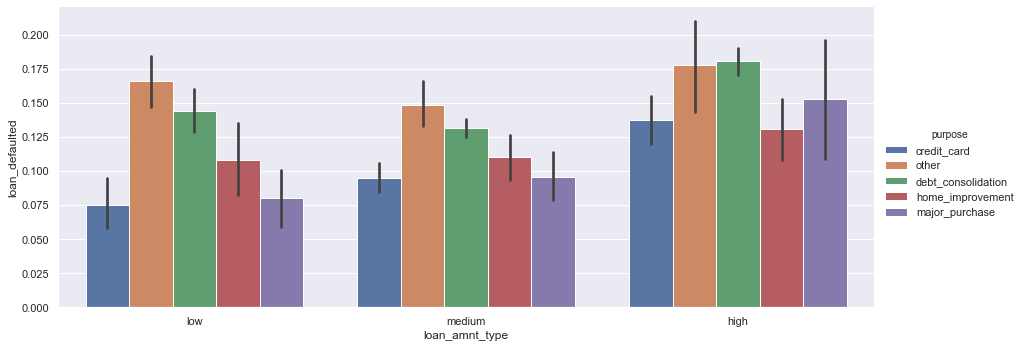

In [118]:
multivariate_analysis('loan_amnt_type')

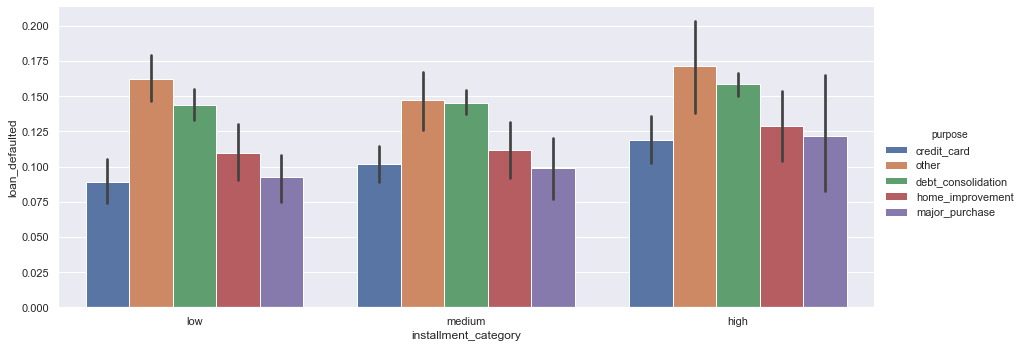

In [119]:
multivariate_analysis('installment_category')

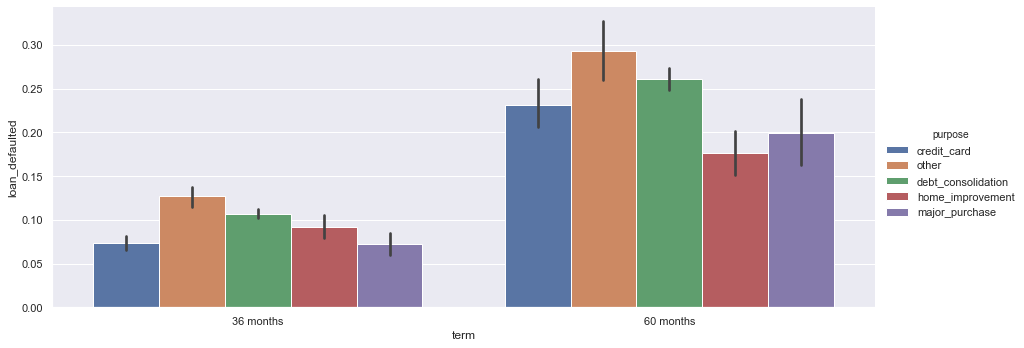

In [120]:
multivariate_analysis('term')

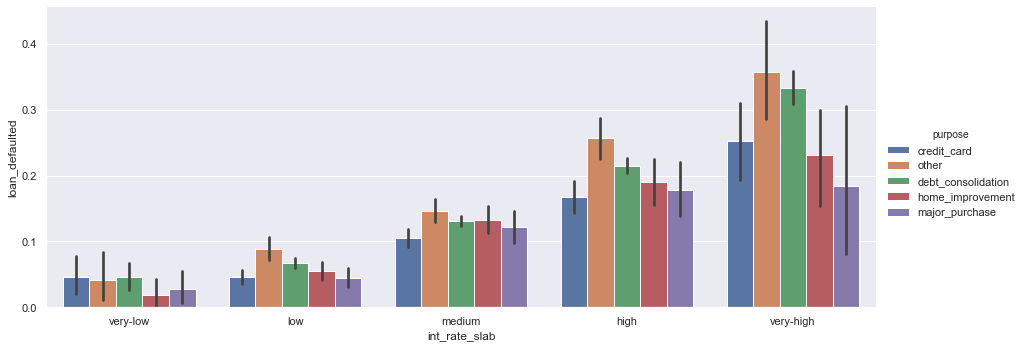

In [121]:
multivariate_analysis('int_rate_slab')

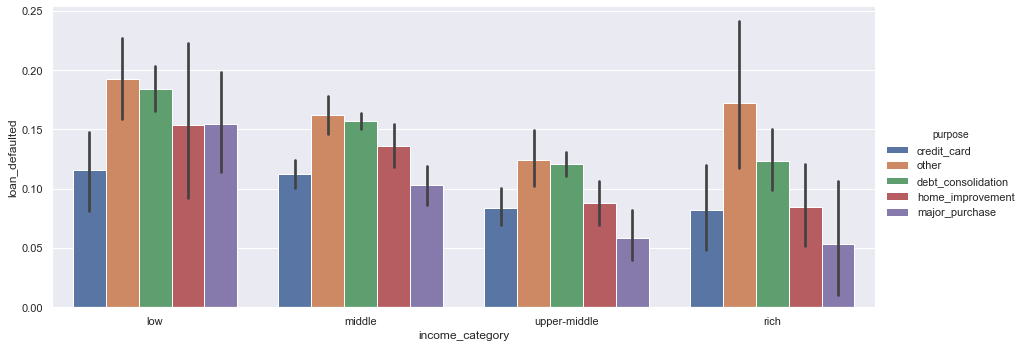

In [122]:
multivariate_analysis('income_category')

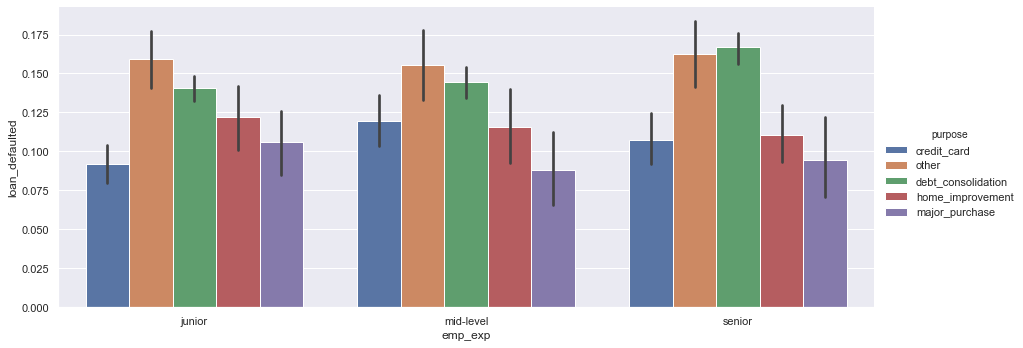

In [123]:
multivariate_analysis('emp_exp')

### From the plot, we can infer that the loans given for `Other` purposes are the most defaulted ones. However, if we ignore `Other`, then *`Debt Consolidation`* is the most defaulted purpose.